# INF6853H  TP1


### Yan Xu 1754774


In this TP, we construct an MLP (Multilayer perceptron) model on the MNIST digits dataset. The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. Especially, in this TP, we add extra connections between non-consecutive layers, like ResNet, and investigate whether such skip connections can improve the performance of the MLP model.

In [55]:
# Firstly, download the MNIST dataset.

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Dataset downloaded.")

Dataset downloaded.


In [51]:
# Explore the dataset

print(X_train.shape)

print("Training set size:", X_train.shape[0])

image1 = X_train[0]
height = len(image1)
width = len(image1[0])

print("Image size:", width, "x", height)

(60000, 28, 28)
Training set size: 60000
Image size: 28 x 28


[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0]


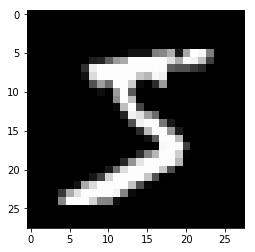

In [79]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(X_train[0], cmap='gray')
print(y_train[0])

### Model 1: Simple MLP model use ReLU

In [63]:
# Build our first simply MLP model

from keras.models import Sequential  
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile('sgd', 'categorical_crossentropy', ['accuracy'])

In [75]:
# Train the model

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()

y_train = label_binarizer.fit_transform(y_train)

history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s - loss: 0.0460 - acc: 0.9848 - val_loss: 0.1709 - val_acc: 0.9646
Epoch 2/20
48000/48000 [==============================] - 4s - loss: 0.0405 - acc: 0.9872 - val_loss: 0.1666 - val_acc: 0.9654
Epoch 3/20
48000/48000 [==============================] - 4s - loss: 0.0397 - acc: 0.9871 - val_loss: 0.1598 - val_acc: 0.9651
Epoch 4/20
48000/48000 [==============================] - 4s - loss: 0.0366 - acc: 0.9871 - val_loss: 0.1696 - val_acc: 0.9653
Epoch 5/20
48000/48000 [==============================] - 4s - loss: 0.0345 - acc: 0.9887 - val_loss: 0.1620 - val_acc: 0.9664
Epoch 6/20
48000/48000 [==============================] - 4s - loss: 0.0323 - acc: 0.9894 - val_loss: 0.1684 - val_acc: 0.9661
Epoch 7/20
48000/48000 [==============================] - 4s - loss: 0.0311 - acc: 0.9892 - val_loss: 0.1603 - val_acc: 0.9677
Epoch 8/20
48000/48000 [==============================] - 4s 

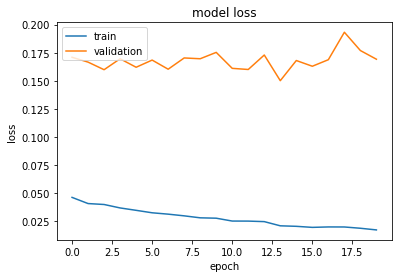

In [76]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the figure above, we can see that the loss on train set continuously decrease. However, the loss on validation set increase after decrease, means that the model is overfit. To overcome the overfit, we will stop the training after epoch 3.

(We can also add dropout between layers, which is not in the scope of this TP)

In [99]:
model.fit(X_train, y_train, epochs=3, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 4s - loss: 0.0169 - acc: 0.9948 - val_loss: 0.1245 - val_acc: 0.9796
Epoch 2/3
48000/48000 [==============================] - 4s - loss: 0.0154 - acc: 0.9950 - val_loss: 0.1170 - val_acc: 0.9793
Epoch 3/3
48000/48000 [==============================] - 4s - loss: 0.0152 - acc: 0.9951 - val_loss: 0.1217 - val_acc: 0.9788


In [100]:
import numpy as np


prediction = model.predict(X_test)
y_predict = np.argmax(prediction, axis=1)

print("The prediction accuracy of the model is:", np.mean(y_test == y_predict))

The prediction accuracy of the model is: 0.9708


### Model 2: Simple MLP model use sigmoid

In [115]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(BatchNormalization())
model2.add(Dense(100, activation='sigmoid'))
model2.add(Dense(100, activation='sigmoid'))
model2.add(Dense(100, activation='sigmoid'))
model2.add(Dense(10, activation='softmax'))

model2.compile('sgd', 'categorical_crossentropy', ['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 5s - loss: 2.2788 - acc: 0.1705 - val_loss: 2.2454 - val_acc: 0.3951
Epoch 2/100
48000/48000 [==============================] - 5s - loss: 2.1882 - acc: 0.3636 - val_loss: 2.0974 - val_acc: 0.3945
Epoch 3/100
48000/48000 [==============================] - 5s - loss: 1.8975 - acc: 0.4915 - val_loss: 1.6210 - val_acc: 0.5905
Epoch 4/100
48000/48000 [==============================] - 5s - loss: 1.3785 - acc: 0.6235 - val_loss: 1.1249 - val_acc: 0.6992
Epoch 5/100
48000/48000 [==============================] - 5s - loss: 1.0101 - acc: 0.7266 - val_loss: 0.8332 - val_acc: 0.7982
Epoch 6/100
48000/48000 [==============================] - 5s - loss: 0.7932 - acc: 0.7845 - val_loss: 0.6553 - val_acc: 0.8363
Epoch 7/100
48000/48000 [==============================] - 5s - loss: 0.6537 - acc: 0.8204 - val_loss: 0.5444 - val_acc: 0.8598
Epoch 8/100
48000/48000 [=============================

48000/48000 [==============================] - 5s - loss: 0.1093 - acc: 0.9682 - val_loss: 0.1371 - val_acc: 0.9611
Epoch 65/100
48000/48000 [==============================] - 5s - loss: 0.1059 - acc: 0.9697 - val_loss: 0.1361 - val_acc: 0.9615
Epoch 66/100
48000/48000 [==============================] - 5s - loss: 0.1066 - acc: 0.9692 - val_loss: 0.1321 - val_acc: 0.9627
Epoch 67/100
48000/48000 [==============================] - 5s - loss: 0.1032 - acc: 0.9706 - val_loss: 0.1350 - val_acc: 0.9617
Epoch 68/100
48000/48000 [==============================] - 5s - loss: 0.0994 - acc: 0.9717 - val_loss: 0.1322 - val_acc: 0.9621
Epoch 69/100
48000/48000 [==============================] - 5s - loss: 0.0990 - acc: 0.9721 - val_loss: 0.1296 - val_acc: 0.9629
Epoch 70/100
48000/48000 [==============================] - 5s - loss: 0.0981 - acc: 0.9725 - val_loss: 0.1313 - val_acc: 0.9624
Epoch 71/100
48000/48000 [==============================] - 5s - loss: 0.0944 - acc: 0.9733 - val_loss: 0.1301

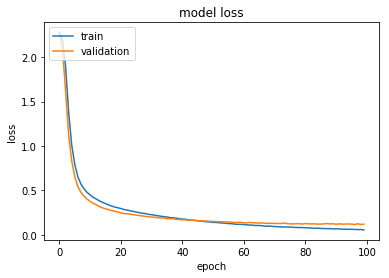

In [116]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We see that with sigmoid, the model training take more time, 100 epoch is a reasonable training time as the validation error no longer decrease. 

We can also observe that the loss is higher than the model with "ReLU"

In [117]:
prediction = model2.predict(X_test)
y_predict = np.argmax(prediction, axis=1)

print("The prediction accuracy of the model is:", np.mean(y_test == y_predict))

The prediction accuracy of the model is: 0.966


### Model 3: MLP with sigmoid skip connections

In [118]:
from keras.models import Model
from keras.layers import Input, Dense, merge
from keras.layers.merge import Add


i = Input(shape=(28, 28, ))
a = Flatten()(i)
b = BatchNormalization()(a)
c = Dense(100, activation='sigmoid')(b)
d = Dense(100, activation='sigmoid')(c)
e = Dense(100, activation='sigmoid')(d)
f = Add()([c, e])
g = Dense(10, activation="softmax")(f)

model3 = Model(inputs=i, outputs=g)

model3.compile('sgd', 'categorical_crossentropy', ['accuracy'])

#X_train.shape
#y_train.shape
history3 = model3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 6s - loss: 0.9801 - acc: 0.7703 - val_loss: 0.5212 - val_acc: 0.8748
Epoch 2/100
48000/48000 [==============================] - 5s - loss: 0.4961 - acc: 0.8702 - val_loss: 0.3829 - val_acc: 0.8999
Epoch 3/100
48000/48000 [==============================] - 5s - loss: 0.4096 - acc: 0.8853 - val_loss: 0.3311 - val_acc: 0.9095
Epoch 4/100
48000/48000 [==============================] - 5s - loss: 0.3675 - acc: 0.8935 - val_loss: 0.3049 - val_acc: 0.9142
Epoch 5/100
48000/48000 [==============================] - 5s - loss: 0.3418 - acc: 0.9014 - val_loss: 0.2892 - val_acc: 0.9173
Epoch 6/100
48000/48000 [==============================] - 5s - loss: 0.3264 - acc: 0.9045 - val_loss: 0.2758 - val_acc: 0.9196
Epoch 7/100
48000/48000 [==============================] - 5s - loss: 0.3132 - acc: 0.9075 - val_loss: 0.2659 - val_acc: 0.9229
Epoch 8/100
48000/48000 [=============================

48000/48000 [==============================] - 5s - loss: 0.1118 - acc: 0.9675 - val_loss: 0.1385 - val_acc: 0.9603
Epoch 65/100
48000/48000 [==============================] - 5s - loss: 0.1100 - acc: 0.9689 - val_loss: 0.1323 - val_acc: 0.9603
Epoch 66/100
48000/48000 [==============================] - 5s - loss: 0.1097 - acc: 0.9682 - val_loss: 0.1341 - val_acc: 0.9603
Epoch 67/100
48000/48000 [==============================] - 5s - loss: 0.1086 - acc: 0.9685 - val_loss: 0.1342 - val_acc: 0.9613
Epoch 68/100
48000/48000 [==============================] - 5s - loss: 0.1070 - acc: 0.9690 - val_loss: 0.1344 - val_acc: 0.9607
Epoch 69/100
48000/48000 [==============================] - 5s - loss: 0.1056 - acc: 0.9690 - val_loss: 0.1321 - val_acc: 0.9613
Epoch 70/100
48000/48000 [==============================] - 5s - loss: 0.1041 - acc: 0.9702 - val_loss: 0.1355 - val_acc: 0.9604
Epoch 71/100
48000/48000 [==============================] - 5s - loss: 0.1027 - acc: 0.9711 - val_loss: 0.1332

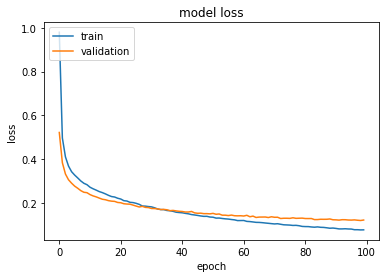

In [119]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [120]:
prediction = model3.predict(X_test)
y_predict = np.argmax(prediction, axis=1)

print("The prediction accuracy of the model is:", np.mean(y_test == y_predict))

The prediction accuracy of the model is: 0.9666


### Model 4: MLP with ReLU with skip connections

In [122]:
i = Input(shape=(28, 28, ))
a = Flatten()(i)
b = BatchNormalization()(a)
c = Dense(100, activation='relu')(b)
d = Dense(100, activation='relu')(c)
e = Dense(100, activation='relu')(d)
f = Add()([c, e])
g = Dense(10, activation="softmax")(f)

model4 = Model(inputs=i, outputs=g)

model4.compile('sgd', 'categorical_crossentropy', ['accuracy'])

# 13 epochs is the best, after the model get overfitted
history4 = model4.fit(X_train, y_train, epochs=13, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/13
48000/48000 [==============================] - 6s - loss: 0.4525 - acc: 0.8672 - val_loss: 0.2783 - val_acc: 0.9272
Epoch 2/13
48000/48000 [==============================] - 5s - loss: 0.2345 - acc: 0.9306 - val_loss: 0.2385 - val_acc: 0.9403
Epoch 3/13
48000/48000 [==============================] - 5s - loss: 0.1868 - acc: 0.9447 - val_loss: 0.2030 - val_acc: 0.9485
Epoch 4/13
48000/48000 [==============================] - 5s - loss: 0.1591 - acc: 0.9522 - val_loss: 0.1941 - val_acc: 0.9504
Epoch 5/13
48000/48000 [==============================] - 5s - loss: 0.1368 - acc: 0.9590 - val_loss: 0.2010 - val_acc: 0.9520
Epoch 6/13
48000/48000 [==============================] - 5s - loss: 0.1223 - acc: 0.9630 - val_loss: 0.1751 - val_acc: 0.9563
Epoch 7/13
48000/48000 [==============================] - 5s - loss: 0.1099 - acc: 0.9662 - val_loss: 0.1708 - val_acc: 0.9591
Epoch 8/13
48000/48000 [==============================] - 5s 

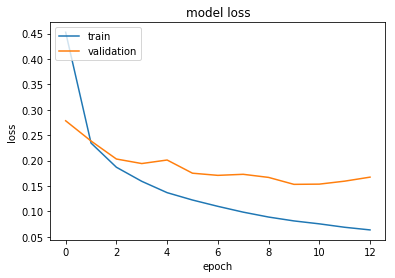

In [123]:
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [124]:
prediction = model4.predict(X_test)
y_predict = np.argmax(prediction, axis=1)

print("The prediction accuracy of the model is:", np.mean(y_test == y_predict))

The prediction accuracy of the model is: 0.9645
